/var/folders/j7/ms50hmkx4sxgmqrwysp2jpgm0000gn/T/ipykernel_88481/2560277783.py:6: RuntimeWarning: overflow encountered in exp
  exp_term = np.exp(v * x / k)
/var/folders/j7/ms50hmkx4sxgmqrwysp2jpgm0000gn/T/ipykernel_88481/2560277783.py:7: RuntimeWarning: overflow encountered in exp
  return (x - (exp_term - 1) / (np.exp(v/k) - 1)) / v
/var/folders/j7/ms50hmkx4sxgmqrwysp2jpgm0000gn/T/ipykernel_88481/2560277783.py:7: RuntimeWarning: invalid value encountered in divide
  return (x - (exp_term - 1) / (np.exp(v/k) - 1)) / v


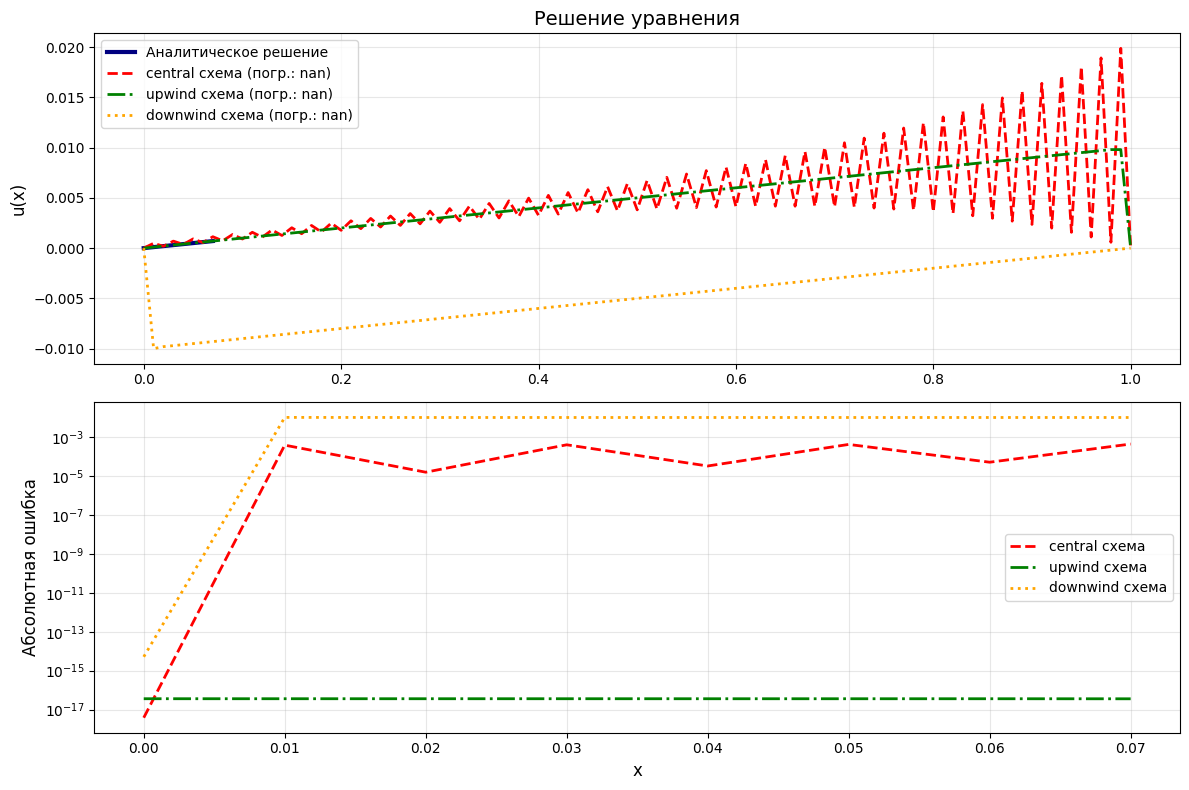

Влияние параметров на точность:
1.0, 0.1             (v=1.0, k=0.1): ошибка = 8.21e-05
2.0, 0.1             (v=2.0, k=0.1): ошибка = 8.25e-05
1.0, 0.05            (v=1.0, k=0.05): ошибка = 1.65e-04
0.5, 0.2             (v=0.5, k=0.2): ошибка = 1.61e-05


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def exact(x, v, k):
    """Точное решение"""
    exp_term = np.exp(v * x / k)
    return (x - (exp_term - 1) / (np.exp(v/k) - 1)) / v

def solve_eq(n_points, v, k, scheme='central'):
    """Численное решение разными схемами"""
    dx = 1.0 / (n_points - 1)
    x_vals = np.linspace(0, 1, n_points)
    
    A = np.zeros((n_points, n_points))
    rhs = np.ones(n_points)
    
    A[0, 0] = 1
    rhs[0] = 0
    A[-1, -1] = 1
    rhs[-1] = 0
    
    # внутренние точки
    for i in range(1, n_points-1):
        # Вторая производная
        A[i, i-1] = -k/(dx*dx)
        A[i, i] = 2*k/(dx*dx)
        A[i, i+1] = -k/(dx*dx)
        
        # Первая производная по выбранной схеме
        if scheme == 'central':
            A[i, i-1] += -v/(2*dx)
            A[i, i+1] += v/(2*dx)
        elif scheme == 'upwind':
            A[i, i-1] += -v/dx
            A[i, i] += v/dx
        elif scheme == 'downwind':
            A[i, i] += -v/dx
            A[i, i+1] += v/dx
    
    return x_vals, np.linalg.solve(A, rhs)




mu = 100
kxx = 0.01
n = 101


x_points = np.linspace(0, 1, n)
u_exact = exact(x_points, mu, kxx)





schemes = ['central', 'upwind', 'downwind']

plt.figure(figsize=(12, 8))

ax1 = plt.subplot(2, 1, 1)
plt.plot(x_points, u_exact, color='navy', linewidth=3, 
         label='Аналитическое решение', linestyle='-')

colors = ['red', 'green', 'orange']
linestyles = ['--', '-.', ':']

for i, scheme in enumerate(schemes):
    x_num, u_num = solve_eq(n, mu, kxx, scheme)
    error = np.mean(np.abs(u_num - u_exact))
    plt.plot(x_num, u_num, color=colors[i], linewidth=2, 
             linestyle=linestyles[i], 
             label=f'{scheme} схема (погр.: {error:.1e})')

plt.ylabel('u(x)', fontsize=12)
plt.title('Решение уравнения', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# График ошибок
ax2 = plt.subplot(2, 1, 2)
for i, scheme in enumerate(schemes):
    x_num, u_num = solve_eq(n, mu, kxx, scheme)
    error = np.abs(u_num - u_exact)
    plt.semilogy(x_num, error, color=colors[i], linewidth=2,
                linestyle=linestyles[i], label=f'{scheme} схема')

plt.xlabel('x', fontsize=12)
plt.ylabel('Абсолютная ошибка', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ различных параметров
print("Влияние параметров на точность:")
test_cases = [
    (1.0, 0.1, "1.0, 0.1"),
    (2.0, 0.1, "2.0, 0.1"),
    (1.0, 0.05, "1.0, 0.05"),
    (0.5, 0.2, "0.5, 0.2")
]

for v_test, k_test, desc in test_cases:
    u_test = exact(x_points, v_test, k_test)
    _, u_central = solve_eq(n, v_test, k_test, 'central')
    error = np.mean(np.abs(u_central - u_test))
    print(f"{desc:20} (v={v_test}, k={k_test}): ошибка = {error:.2e}")